In [21]:
import pandas as pd
import matplotlib as mt
from sklearn.model_selection import train_test_split


In [22]:
from sklearn.naive_bayes import GaussianNB

In [23]:
data = pd.read_csv('all_in_balanceado.csv')
data.head()

,id,Per. Ingresso,Curso,Forma de Ingresso,Sigla Cota,Escola Pública?,Coeficiente,Sexo,Idade,Situação Atual do Aluno,...,Aprovado por Nota/Frequência,Reprovado por Nota/Frequência,Crédito Consignado,Reprovado por Nota,Aprovado em Exame de Suficiência,Aprovado por Nota,Reprovado por Frequência,Reprovado em Exame de Suficência,Reprovado,Aprovado por Frequência
0,eg335c,1,Ciência Da Computação,SISU - Sistema de Seleção Unificada,Não cotista,Escola Pública,0.14740,M,27,Desistente/Jubilado,...,1,1,0,4,0,0,0,0,0,0
1,788a5c,1,Ciência Da Computação,SISU - Sistema de Seleção Unificada,Cotista,Escola Pública,0.34150,F,27,Desistente/Jubilado,...,2,0,0,4,0,0,0,0,0,0
2,nh1pjk,1,Ciência Da Computação,SISU - Sistema de Seleção Unificada,Não cotista,Escola Particular,0.25750,M,27,Desistente/Jubilado,...,5,6,0,4,0,0,0,0,0,0
3,31hbpx,1,Ciência Da Computação,SISU - Sistema de Seleção Unificada,Cotista,Escola Pública,0.16430,M,37,Desistente/Jubilado,...,0,9,3,0,0,0,0,0,0,0
4,bfo4ff,1,Ciência Da Computação,SISU - Sistema de Seleção Unificada,Não cotista,Escola Particular,0.15593,M,27,Desistente/Jubilado,...,3,12,0,6,0,0,0,0,0,0


In [24]:
data = data.drop(columns=['id'])

In [25]:
# Encoding ---

# 1. Transformar a coluna Alvo (Target) em 0 e 1
# Desistente = 1, Regular = 0
mapa_target = {'Desistente/Jubilado': 1, 'Regular/Formado': 0}
data['Situação Atual do Aluno'] = data['Situação Atual do Aluno'].map(mapa_target)

# 2. Converter colunas binárias manualmente para garantir 0 e 1
data['Curso'] = data['Curso'].apply(lambda x: 1 if x == 'Ciência Da Computação' else 0)
data['Sexo'] = data['Sexo'].apply(lambda x: 1 if x == 'M' else 0)
data['Escola Pública?'] = data['Escola Pública?'].apply(lambda x: 1 if x == 'Escola Pública' else 0)

# 3. Aplicar o One-Hot Encoding (AQUI usamos o pd.get_dummies)
# converte todas as outras colunas de texto em colunas numéricas
colunas_categoricas = data.select_dtypes(include=['object']).columns.tolist()
df_encoded = pd.get_dummies(data, columns=colunas_categoricas)


In [26]:
# Separação das variáveis

# X: São os dados que o modelo usa para prever
X = df_encoded.drop('Situação Atual do Aluno', axis=1)

# y: É a resposta correta
y = df_encoded['Situação Atual do Aluno']

In [27]:
#Separação do anco de dados em teste e treinamento
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=125
)

#Naves Bayes

In [28]:
from sklearn.naive_bayes import MultinomialNB

# 1. Criar o modelo
modelo = MultinomialNB()

# 2. Treina o modelo com os dados de treino
modelo.fit(X_train, y_train)

print("Modelo treinado com sucesso!")

Modelo treinado com sucesso!


In [29]:
from sklearn.metrics import accuracy_score

# 1. Fazer as previsões usando os dados de teste
previsoes = modelo.predict(X_test)

# 2. Calcular a acurácia comparando com o y_test
acuracia = accuracy_score(y_test, previsoes)

print(f"Acurácia do modelo: {acuracia:.2%}")

Acurácia do modelo: 79.32%


In [30]:
from sklearn.metrics import confusion_matrix

# Calcular a matriz de confusão
matriz = confusion_matrix(y_test, previsoes)

print(matriz)

[[182  63]
 [ 34 190]]


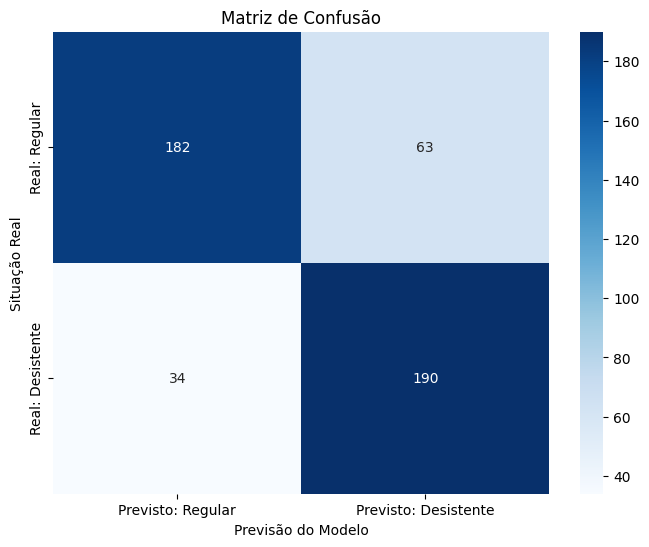

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configurar o tamanho da figura
plt.figure(figsize=(8, 6))

# Criar o mapa de calor
sns.heatmap(matriz, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Previsto: Regular', 'Previsto: Desistente'],
            yticklabels=['Real: Regular', 'Real: Desistente'])

# Adicionar rótulos
plt.xlabel('Previsão do Modelo')
plt.ylabel('Situação Real')
plt.title('Matriz de Confusão')
plt.show()

#Clustering hierárquico

In [32]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# 1. Criar o normalizador
scaler = MinMaxScaler()

# 2. Ajustar e transformar os dados
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Vizualizar
print("Dados normalizados!")
print(X_scaled.head())

Dados normalizados!
   Per. Ingresso  Curso  Escola Pública?  Coeficiente  Sexo     Idade  \
0            0.0    1.0              1.0     0.150716   1.0  0.217391   
1            0.0    1.0              1.0     0.349182   0.0  0.217391   
2            0.0    1.0              0.0     0.263292   1.0  0.217391   
3            0.0    1.0              1.0     0.167996   1.0  0.434783   
4            0.0    1.0              0.0     0.159438   1.0  0.217391   

   Período do Aluno  Aprovado por Nota/Frequência  \
0               0.0                      0.019231   
1               0.0                      0.038462   
2               0.0                      0.096154   
3               0.0                      0.000000   
4               0.0                      0.057692   

   Reprovado por Nota/Frequência  Crédito Consignado  ...  \
0                       0.016129            0.000000  ...   
1                       0.000000            0.000000  ...   
2                       0.096774       

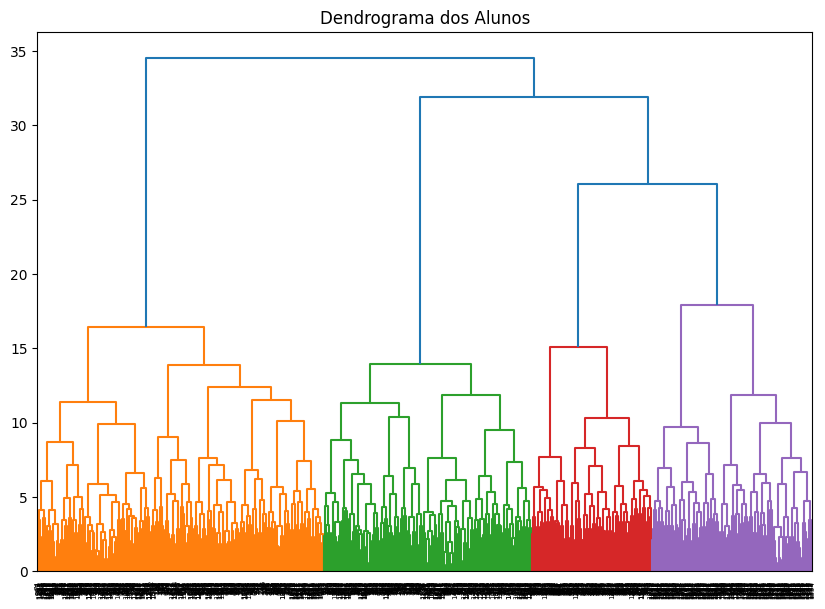

In [33]:
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Dendrograma dos Alunos")

# O método 'ward' tenta minimizar a variância dentro de cada cluster
dend = shc.dendrogram(shc.linkage(X_scaled, method='ward'))

plt.show()

In [34]:
from sklearn.cluster import AgglomerativeClustering

# 1. Criar o modelo pedindo 2 grupos (para tentar imitar Desistente vs Regular)
cluster = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')

# 2. Treinar e prever os grupos
grupos_previstos = cluster.fit_predict(X_scaled)

print("Alunos agrupados com sucesso!")


Alunos agrupados com sucesso!


In [35]:
from sklearn.metrics import accuracy_score, confusion_matrix

# 1. Calcular a acurácia
acc = accuracy_score(y, grupos_previstos)
print(f"Acurácia direta: {acc:.2%}")

# 2.Matriz de confusão
print("\nMatriz de Confusão (Linhas=Real, Colunas=Cluster):")
print(confusion_matrix(y, grupos_previstos))

Acurácia direta: 51.16%

Matriz de Confusão (Linhas=Real, Colunas=Cluster):
[[456 254]
 [440 271]]


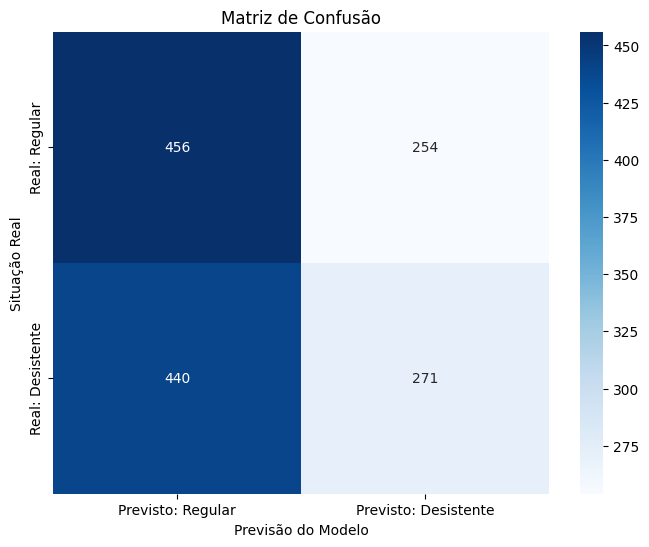

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configurar o tamanho da figura
plt.figure(figsize=(8, 6))

# Criar o mapa de calor
sns.heatmap(confusion_matrix(y, grupos_previstos), annot=True, fmt='d', cmap='Blues',
            xticklabels=['Previsto: Regular', 'Previsto: Desistente'],
            yticklabels=['Real: Regular', 'Real: Desistente'])

# Adicionar rótulos
plt.xlabel('Previsão do Modelo')
plt.ylabel('Situação Real')
plt.title('Matriz de Confusão')
plt.show()

Teste com colunas selecionadas

Novas Features: ['Coeficiente', 'Período do Aluno']
Nova Acurácia: 80.23%


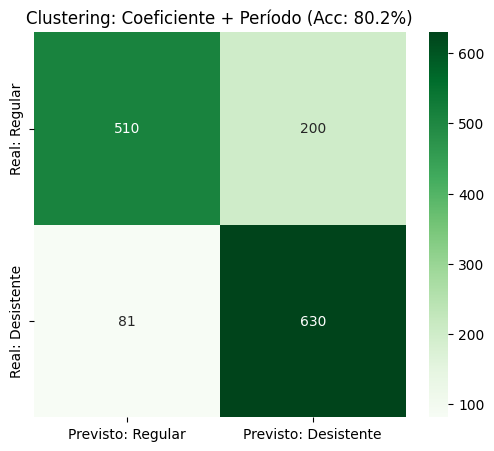

In [37]:
# 1. Selecionar a "Dupla Dinâmica"
df_original = pd.read_csv('all_in_balanceado.csv')

# Preparar o 'y' original para comparação
mapa_target = {'Desistente/Jubilado': 1, 'Regular/Formado': 0}
y_real = df_original['Situação Atual do Aluno'].map(mapa_target)

features_novas = ['Coeficiente', 'Período do Aluno']
X_final = df_original[features_novas]

# 2. Normalizar
scaler = MinMaxScaler()
X_final_scaled = pd.DataFrame(scaler.fit_transform(X_final), columns=features_novas)

# 3. Clustering
cluster = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
preds_final = cluster.fit_predict(X_final_scaled)

# 4. Verificar Acurácia
acc1 = accuracy_score(y_real, preds_final)
acc2 = accuracy_score(y_real, 1 - preds_final)

if acc2 > acc1:
    melhor_pred = 1 - preds_final
    acc_final = acc2
else:
    melhor_pred = preds_final
    acc_final = acc1

print(f"Novas Features: {features_novas}")
print(f"Nova Acurácia: {acc_final:.2%}")

# 5. Matriz de Confusão
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_real, melhor_pred), annot=True, fmt='d', cmap='Greens',
            xticklabels=['Previsto: Regular', 'Previsto: Desistente'],
            yticklabels=['Real: Regular', 'Real: Desistente'])
plt.title(f'Clustering: Coeficiente + Período (Acc: {acc_final:.1%})')
plt.show()

Teste do naives com alpha

In [38]:


# 1. Carregar a base original e preparar (Usando TODAS as colunas)
df = pd.read_csv('all_in_balanceado.csv')
df = df.drop(columns=['id'])

# Target
mapa_target = {'Desistente/Jubilado': 1, 'Regular/Formado': 0}
# Atribui o alvo 'y' e remove a coluna original do df para que não seja tratada como feature
y = df['Situação Atual do Aluno'].map(mapa_target)
df = df.drop('Situação Atual do Aluno', axis=1)

# Features (Processo completo de Encoding)
# Binárias manuais
df['Curso'] = df['Curso'].apply(lambda x: 1 if x == 'Ciência Da Computação' else 0)
df['Sexo'] = df['Sexo'].apply(lambda x: 1 if x == 'M' else 0)
df['Escola Pública?'] = df['Escola Pública?'].apply(lambda x: 1 if x == 'Escola Pública' else 0)

# One-Hot Encoding para o resto
colunas_categoricas = df.select_dtypes(include=['object']).columns.tolist()
df_encoded = pd.get_dummies(df, columns=colunas_categoricas)

# X é agora o df_encoded, pois a coluna alvo já foi removida anteriormente
X = df_encoded

# 2. Dividir Treino e Teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=125)

# 3. Testar vários valores de Alpha (Otimização)
valores_alpha = [0.01, 0.1, 0.5, 1.0, 2.0, 5.0, 10.0]
melhor_acc = 0
melhor_alpha = 0

print(f"{'Alpha':<10} | {'Acurácia':<10}")
print("-" * 25)

for alpha_teste in valores_alpha:
    # Criar modelo com o alpha atual
    modelo = MultinomialNB(alpha=alpha_teste)
    modelo.fit(X_train, y_train)

    # Prever e avaliar
    acc = accuracy_score(y_test, modelo.predict(X_test))

    print(f"{alpha_teste:<10} | {acc:.2%}")

    if acc > melhor_acc:
        melhor_acc = acc
        melhor_alpha = alpha_teste

print("-" * 25)
print(f"🏆 Melhor Alpha: {melhor_alpha}")
print(f"🏆 Melhor Acurácia: {melhor_acc:.2%}")

Alpha      | Acurácia  
-------------------------
0.01       | 79.32%
0.1        | 79.32%
0.5        | 79.32%
1.0        | 79.32%
2.0        | 79.32%
5.0        | 79.53%
10.0       | 79.74%
-------------------------
🏆 Melhor Alpha: 10.0
🏆 Melhor Acurácia: 79.74%


Gráfico gerado!


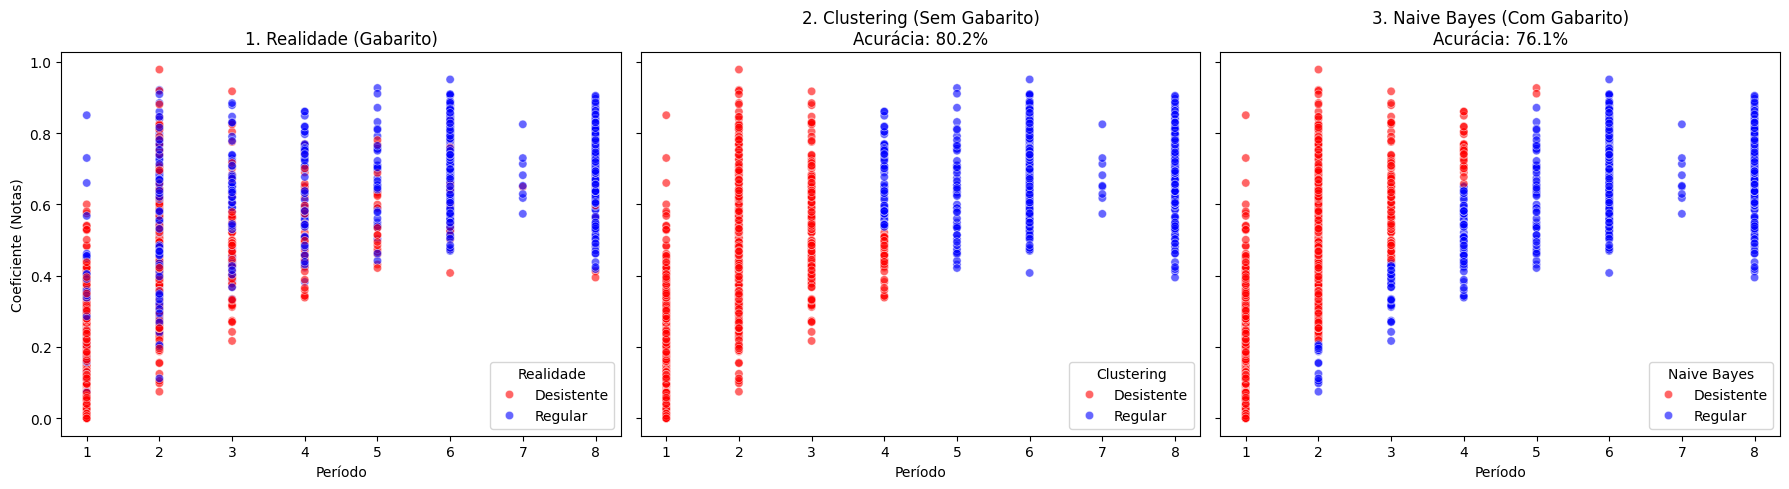

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# 1. Carregar e Preparar
df = pd.read_csv('all_in_balanceado.csv')
mapa_target = {'Desistente/Jubilado': 1, 'Regular/Formado': 0}
df['Target'] = df['Situação Atual do Aluno'].map(mapa_target)

# Features Selecionadas
features = ['Coeficiente', 'Período do Aluno']
X = df[features]

# Normalizar
scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=features)
y = df['Target']

# --- MODELO 1: Clustering (Otimizado) ---
cluster = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
preds_cluster = cluster.fit_predict(X_scaled)

# Alinhar cores (se cluster 0 for desistente, manter; senão, inverter)
acc_original = accuracy_score(y, preds_cluster)
acc_inverted = accuracy_score(y, 1 - preds_cluster)
if acc_inverted > acc_original:
    preds_cluster = 1 - preds_cluster

# --- MODELO 2: Naive Bayes (Otimizado) ---
# Treinando com TODOS os dados para visualização do padrão geral
nb = MultinomialNB(alpha=0.01) # Usando o melhor alpha encontrado
nb.fit(X_scaled, y)
preds_nb = nb.predict(X_scaled)

# --- VISUALIZAÇÃO ---
# Criar um DataFrame para facilitar o plot
plot_df = X.copy()
plot_df['Realidade'] = y.map({0: 'Regular', 1: 'Desistente'})
plot_df['Clustering'] = pd.Series(preds_cluster).map({0: 'Regular', 1: 'Desistente'})
plot_df['Naive Bayes'] = pd.Series(preds_nb).map({0: 'Regular', 1: 'Desistente'})

# Configurar a figura com 3 subplots lado a lado
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

# Cores consistentes: Azul para Regular, Vermelho para Desistente
cores = {'Regular': 'blue', 'Desistente': 'red'}

# Plot 1: Realidade
sns.scatterplot(data=plot_df, x='Período do Aluno', y='Coeficiente', hue='Realidade', palette=cores, ax=axes[0], alpha=0.6)
axes[0].set_title('1. Realidade (Gabarito)')
axes[0].set_xlabel('Período')
axes[0].set_ylabel('Coeficiente (Notas)')

# Plot 2: Clustering
sns.scatterplot(data=plot_df, x='Período do Aluno', y='Coeficiente', hue='Clustering', palette=cores, ax=axes[1], alpha=0.6)
axes[1].set_title(f'2. Clustering (Sem Gabarito)\nAcurácia: {max(acc_original, acc_inverted):.1%}')
axes[1].set_xlabel('Período')

# Plot 3: Naive Bayes
acc_nb = accuracy_score(y, preds_nb)
sns.scatterplot(data=plot_df, x='Período do Aluno', y='Coeficiente', hue='Naive Bayes', palette=cores, ax=axes[2], alpha=0.6)
axes[2].set_title(f'3. Naive Bayes (Com Gabarito)\nAcurácia: {acc_nb:.1%}')
axes[2].set_xlabel('Período')

plt.tight_layout()
plt.savefig('comparacao_visual_modelos.png')
print("Gráfico gerado!")